<center><strong>Metode Numerik</strong><br /><strong><span style="color: blue;">Solusi Numerik Persamaan nonlinear </span></strong><br /><img style="height: 200px;" src="images/MetNum.png" alt="" /></center>

<center>(C) Taufik Sutanto - 2019</center><center><strong>tau-data Indonesia</strong></center>

<p><strong><big>III. Solusi Numerik Persamaan nonlinear:</big></strong></p>

<ol>
	<li>Fixed Points Problem: x = g(x)</li>
	<li>Bisection : c = (a+b)/2</li>
	<li>A little fix to Bisection: Regula Falsi</li>
	<li>Approximate Location of Roots</li>
	<li>Newton Rhapson Method</li>
	<li>Secant Method</li>
</ol>

<p>* All with Convergence Rate, Error Analysis,&nbsp;Application, &amp; Practice..</p>


<h3 id="Permasalahan-mencari-Akar-(Roots)-dari-suatu-persamaan">Permasalahan mencari Akar (Roots) dari suatu persamaan</h3>

<ul>
	<li>Pada bidang ilmu Matematika, Statistika, Fisika, Teknik, dsb sering dijumpai permasalahan seperti berikut:</li>
	<li>_Diberikan sebuah fungsi kontinu <span class="MathJax_Preview" style="color: inherit;"><span class="MJXp-math" id="MJXp-Span-397"><span class="MJXp-mi MJXp-italic" id="MJXp-Span-398">f</span><span class="MJXp-mo" id="MJXp-Span-399" style="margin-left: 0em; margin-right: 0em;">(</span><span class="MJXp-mi MJXp-italic" id="MJXp-Span-400">x</span><span class="MJXp-mo" id="MJXp-Span-401" style="margin-left: 0em; margin-right: 0em;">)</span></span></span><script type="math/tex" id="MathJax-Element-37">f(x)</script>, tentukan nilai <span class="MathJax_Preview" style="color: inherit;"><span class="MJXp-math" id="MJXp-Span-402"><span class="MJXp-mi MJXp-italic" id="MJXp-Span-403">r</span></span></span><script type="math/tex" id="MathJax-Element-38">r</script> sedemikian sehingga <span class="MathJax_Preview" style="color: inherit;"><span class="MJXp-math" id="MJXp-Span-404"><span class="MJXp-mi MJXp-italic" id="MJXp-Span-405">f</span><span class="MJXp-mo" id="MJXp-Span-406" style="margin-left: 0em; margin-right: 0em;">(</span><span class="MJXp-mi MJXp-italic" id="MJXp-Span-407">r</span><span class="MJXp-mo" id="MJXp-Span-408" style="margin-left: 0em; margin-right: 0em;">)</span><span class="MJXp-mo" id="MJXp-Span-409" style="margin-left: 0.333em; margin-right: 0.333em;">=</span><span class="MJXp-mn" id="MJXp-Span-410">0</span></span></span><script type="math/tex" id="MathJax-Element-39">f(r)=0</script>.</li>
	<li>Permasalahan seperti diatas disebut sebagai &quot;root finding problems&quot;</li>
</ul>

<p><img alt="" src="images/roots.png" style="width: 350px; height: 217px;" /></p>


### <font color="blue"> Diskusi </font>
* Apa contoh aplikasi penting mencari akar?

### Akar Persamaan (Roots of Equations): Contoh
* $r=-2, 3, -1$ adalah akar-akar dari persamaan:
  $x^4-3x^3-7x^2+15x=-18$
* Solusi tersebut dapat divalidasi secara analytic dengan menuliskan persamaannya sebagai: 
  $(x+2)(x-3)^2(x+1)=0$
* Kita bahkan memiliki solusi akar persamaan untuk sembarang polinomial derajat dua.
* $ax^2+bx+c = 0 $ memiliki akar-akar $x_{(1,2)} = \frac{-b \pm \sqrt{b^2-4ac}}{2a}$
* Namun sayangnya hanya sedikit sekali persamaan yang bisa kita selesaikan secara analytic.
* Bahkan kita tidak memiliki solusi analytic untuk persamaan yang sederhana seperti $x=cos(x)$
* Pada kesempatan ini kita akan mencoba mencari cara (numerik) yang secara iteratif akan menemukan solusi pendekatan untuk "sembarang" fungsi Non-linear. 

* What about linear? ... :)

In [3]:
# Python code untuk Fungsi
def P(x):
    return x**4 -3*x**3-7*x**2+15*x+18

print(P(3))

0


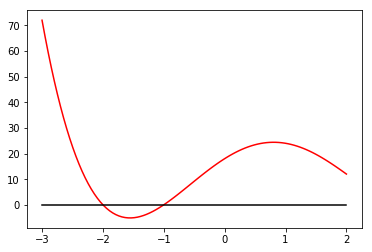

In [6]:
#inline pylab
# Python code untuk plot suatu fungsi
import pylab, numpy
X = numpy.linspace(-3,2,100) # 100 titik antara -3 sampai 2
y = [P(x) for x in X] # nilai fungsi di setiap titik
pylab.plot(X,y,'r') # "red", atau r* ro , dsb
pylab.plot(X,[0]*100,'k') # sumbu x, 'k'=hitam

<h3 id="Secara-umum-terdapat-3-cara-dalam-menyelesaikan-persamaan-tidak-linear:">Secara umum terdapat 3 cara dalam menyelesaikan persamaan tidak linear:</h3>

<ol>
	<li><strong>Solusi Analytic</strong> (seperti contoh sebelumnya)</li>
	<li><strong>Solusi Grafik</strong> (biasanya untuk perkiraan/initial guess metode lain)</li>
	<li><strong>Solusi Numerik</strong> (yang akan kita bahas di Mata Kuliah ini)</li>
</ol>


<h3 id="Kasus-I:-Fixed-Points">Kasus I: Fixed Points</h3>

<ul>
	<li>Nilai-nilai <em>x</em> yang memenuhi&nbsp;<span class="MathJax_Preview" style="color: inherit"><span class="MJXp-math" id="MJXp-Span-113"><span class="MJXp-mi MJXp-italic" id="MJXp-Span-114">x</span><span class="MJXp-mo" id="MJXp-Span-115" style="margin-left: 0.333em ; margin-right: 0.333em">=</span><span class="MJXp-mi MJXp-italic" id="MJXp-Span-116">f</span><span class="MJXp-mo" id="MJXp-Span-117" style="margin-left: 0em ; margin-right: 0em">(</span><span class="MJXp-mi MJXp-italic" id="MJXp-Span-118">x</span><span class="MJXp-mo" id="MJXp-Span-119" style="margin-left: 0em ; margin-right: 0em">)</span></span></span> untuk <span class="MathJax_Preview" style="color: inherit"><span class="MJXp-math" id="MJXp-Span-120"><span class="MJXp-mi MJXp-italic" id="MJXp-Span-121">x</span><span class="MJXp-mo" id="MJXp-Span-122" style="margin-left: 0.333em ; margin-right: 0.333em">&isin;</span><span class="MJXp-mi" id="MJXp-Span-123">&real;</span></span></span> (lihat gambar)&nbsp;disebut sebagai titik-titik tetap (fixed points).</li>
</ul>

<p><span class="MathJax_Preview" style="color: inherit"><span class="MJXp-math"><span class="MJXp-mi"><img alt="" src="images/fixed_point.png" style="width: 360px ; height: 373px" /></span></span></span></p>


## Teorema 1:
* Misal $f\in C[a,b]$ dan $y=f(x)$, jika $a\leq y \leq b$ ketika $a<x<b$, maka $f$ memiliki fixed point pada interval $[a,b]$
* Jika $f$ memiliki turunan di $[a,b]$ dan terdapat $K$ sedemikian sehingga $|f'(x)|\leq K<1$ untuk setiap $x\in (a,b)$, maka $f$ memiliki tepat satu fixed point di $[a,b]$

** Ponder this ... Diskusi cakupan teorema

<h2 id="Teorema-2-(fixed-point-theorem):">Teorema 2 (fixed point theorem):</h2>

<ul>
	<li>Misal <span class="MathJax_Preview" style="color: inherit"><span class="MJXp-math" id="MJXp-Span-1322"><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1323">f</span></span></span> dan <span class="MathJax_Preview" style="color: inherit"><span class="MJXp-math" id="MJXp-Span-1324"><span class="MJXp-msup" id="MJXp-Span-1325"><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1326" style="margin-right: 0.05em">f</span><span class="MJXp-mo MJXp-script" id="MJXp-Span-1327" style="vertical-align: 0.5em">&prime;</span></span></span></span> kontinu di lingkungan <span class="MathJax_Preview" style="color: inherit"><span class="MJXp-math" id="MJXp-Span-1328"><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1329">&delta;</span></span></span> dari <span class="MathJax_Preview" style="color: inherit"><span class="MJXp-math" id="MJXp-Span-1330"><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1331">P</span></span></span> = <span class="MathJax_Preview" style="color: inherit"><span class="MJXp-math" id="MJXp-Span-1332"><span class="MJXp-mo" id="MJXp-Span-1333" style="margin-left: 0em ; margin-right: 0em">(</span><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1334">P</span><span class="MJXp-mo" id="MJXp-Span-1335" style="margin-left: 0.267em ; margin-right: 0.267em">&minus;</span><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1336">&delta;</span><span class="MJXp-mo" id="MJXp-Span-1337" style="margin-left: 0em ; margin-right: 0.222em">,</span><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1338">P</span><span class="MJXp-mo" id="MJXp-Span-1339" style="margin-left: 0.267em ; margin-right: 0.267em">+</span><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1340">&delta;</span><span class="MJXp-mo" id="MJXp-Span-1341" style="margin-left: 0em ; margin-right: 0em">)</span><span class="MJXp-mo" id="MJXp-Span-1342" style="margin-left: 0.333em ; margin-right: 0.333em">=</span><span class="MJXp-mo" id="MJXp-Span-1343" style="margin-left: 0em ; margin-right: 0em">(</span><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1344">a</span><span class="MJXp-mo" id="MJXp-Span-1345" style="margin-left: 0em ; margin-right: 0.222em">,</span><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1346">b</span><span class="MJXp-mo" id="MJXp-Span-1347" style="margin-left: 0em ; margin-right: 0em">)</span></span></span> dan memuat satu fixed point unik <span class="MathJax_Preview" style="color: inherit"><span class="MJXp-math" id="MJXp-Span-1348"><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1349">P</span></span></span>. Jika suatu iterasi dimulai dari <span class="MathJax_Preview" style="color: inherit"><span class="MJXp-math" id="MJXp-Span-1350"><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1351">P</span><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1352">o</span><span class="MJXp-mo" id="MJXp-Span-1353" style="margin-left: 0.333em ; margin-right: 0.333em">&isin;</span><span class="MJXp-mo" id="MJXp-Span-1354" style="margin-left: 0em ; margin-right: 0em">(</span><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1355">a</span><span class="MJXp-mo" id="MJXp-Span-1356" style="margin-left: 0em ; margin-right: 0.222em">,</span><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1357">b</span><span class="MJXp-mo" id="MJXp-Span-1358" style="margin-left: 0em ; margin-right: 0em">)</span></span></span>, maka:</li>
	<li>jika <span class="MathJax_Preview" style="color: inherit"><span class="MJXp-math" id="MJXp-Span-1359"><span class="MJXp-mrow" id="MJXp-Span-1360"><span class="MJXp-mo" id="MJXp-Span-1361" style="margin-left: 0.167em ; margin-right: 0.167em">|</span></span><span class="MJXp-msup" id="MJXp-Span-1362"><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1363" style="margin-right: 0.05em">f</span><span class="MJXp-mo MJXp-script" id="MJXp-Span-1364" style="vertical-align: 0.5em">&prime;</span></span><span class="MJXp-mo" id="MJXp-Span-1365" style="margin-left: 0em ; margin-right: 0em">(</span><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1366">x</span><span class="MJXp-mo" id="MJXp-Span-1367" style="margin-left: 0em ; margin-right: 0em">)</span><span class="MJXp-mrow" id="MJXp-Span-1368"><span class="MJXp-mo" id="MJXp-Span-1369" style="margin-left: 0.167em ; margin-right: 0.167em">|</span></span><span class="MJXp-mo" id="MJXp-Span-1370" style="margin-left: 0.333em ; margin-right: 0.333em">&le;</span><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1371">K</span><span class="MJXp-mo" id="MJXp-Span-1372" style="margin-left: 0.333em ; margin-right: 0.333em">&lt;</span><span class="MJXp-mn" id="MJXp-Span-1373">1</span><span class="MJXp-mi" id="MJXp-Span-1375">&forall;</span><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1377">a</span><span class="MJXp-mo" id="MJXp-Span-1378" style="margin-left: 0.333em ; margin-right: 0.333em">&le;</span><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1379">x</span><span class="MJXp-mo" id="MJXp-Span-1380" style="margin-left: 0.333em ; margin-right: 0.333em">&le;</span><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1381">b</span></span></span>, maka iterasi <span class="MathJax_Preview" style="color: inherit"><span class="MJXp-math" id="MJXp-Span-1382"><span class="MJXp-msubsup" id="MJXp-Span-1383"><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1384" style="margin-right: 0.05em">x</span><span class="MJXp-mi MJXp-italic MJXp-script" id="MJXp-Span-1385" style="vertical-align: -0.4em">n</span></span><span class="MJXp-mo" id="MJXp-Span-1386" style="margin-left: 0.333em ; margin-right: 0.333em">=</span><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1387">f</span><span class="MJXp-mo" id="MJXp-Span-1388" style="margin-left: 0em ; margin-right: 0em">(</span><span class="MJXp-msubsup" id="MJXp-Span-1389"><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1390" style="margin-right: 0.05em">x</span><span class="MJXp-mrow MJXp-script" id="MJXp-Span-1391" style="vertical-align: -0.4em"><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1392">n-</span><span class="MJXp-mn" id="MJXp-Span-1394">1</span></span></span><span class="MJXp-mo" id="MJXp-Span-1395" style="margin-left: 0em ; margin-right: 0em">)</span></span></span> akan konvergen ke <span class="MathJax_Preview" style="color: inherit"><span class="MJXp-math" id="MJXp-Span-1396"><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1397">P</span></span></span>. <span class="MathJax_Preview" style="color: inherit"><span class="MJXp-math" id="MJXp-Span-1398"><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1399">P</span></span></span> disebut sebagai &quot;Attractive Fixed Point&quot;</li>
	<li>jika <span class="MathJax_Preview" style="color: inherit"><span class="MJXp-math" id="MJXp-Span-1400"><span class="MJXp-mrow" id="MJXp-Span-1401"><span class="MJXp-mo" id="MJXp-Span-1402" style="margin-left: 0.167em ; margin-right: 0.167em">|</span></span><span class="MJXp-msup" id="MJXp-Span-1403"><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1404" style="margin-right: 0.05em">f</span><span class="MJXp-mo MJXp-script" id="MJXp-Span-1405" style="vertical-align: 0.5em">&prime;</span></span><span class="MJXp-mo" id="MJXp-Span-1406" style="margin-left: 0em ; margin-right: 0em">(</span><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1407">x</span><span class="MJXp-mo" id="MJXp-Span-1408" style="margin-left: 0em ; margin-right: 0em">)</span><span class="MJXp-mrow" id="MJXp-Span-1409"><span class="MJXp-mo" id="MJXp-Span-1410" style="margin-left: 0.167em ; margin-right: 0.167em">|</span></span><span class="MJXp-mo" id="MJXp-Span-1411" style="margin-left: 0.333em ; margin-right: 0.333em">&gt;</span><span class="MJXp-mn" id="MJXp-Span-1412">1</span><span class="MJXp-mi" id="MJXp-Span-1414">&forall;</span><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1416">a</span><span class="MJXp-mo" id="MJXp-Span-1417" style="margin-left: 0.333em ; margin-right: 0.333em">&le;</span><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1418">x</span><span class="MJXp-mo" id="MJXp-Span-1419" style="margin-left: 0.333em ; margin-right: 0.333em">&le;</span><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1420">b</span></span></span>, maka iterasi <span class="MathJax_Preview" style="color: inherit"><span class="MJXp-math" id="MJXp-Span-1421"><span class="MJXp-msubsup" id="MJXp-Span-1422"><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1423" style="margin-right: 0.05em">x</span><span class="MJXp-mi MJXp-italic MJXp-script" id="MJXp-Span-1424" style="vertical-align: -0.4em">n</span></span><span class="MJXp-mo" id="MJXp-Span-1425" style="margin-left: 0.333em ; margin-right: 0.333em">=</span><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1426">f</span><span class="MJXp-mo" id="MJXp-Span-1427" style="margin-left: 0em ; margin-right: 0em">(</span><span class="MJXp-msubsup" id="MJXp-Span-1428"><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1429" style="margin-right: 0.05em">x</span><span class="MJXp-mrow MJXp-script" id="MJXp-Span-1430" style="vertical-align: -0.4em"><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1431">n</span><span class="MJXp-mo" id="MJXp-Span-1432">-</span><span class="MJXp-mn" id="MJXp-Span-1433">1</span></span></span><span class="MJXp-mo" id="MJXp-Span-1434" style="margin-left: 0em ; margin-right: 0em">)</span></span></span> tidak akan konvergen ke <span class="MathJax_Preview" style="color: inherit"><span class="MJXp-math" id="MJXp-Span-1435"><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1436">P</span></span></span>. <span class="MathJax_Preview" style="color: inherit"><span class="MJXp-math" id="MJXp-Span-1437"><span class="MJXp-mi MJXp-italic" id="MJXp-Span-1438">P</span></span></span> disebut sebagai &quot;Repulsive Fixed Point&quot;</li>
</ul>

<p><img alt="" src="images/fixed_point_iteratio.png" style="width: 360px ; height: 188px" /></p>


### Corolarry
* Misal kondisi pertama teorema 2 terpenuhi, maka
$|P-P_n|\leq \frac{K^n|P_1-P_0|}{1-K}$

* Mengapa corolarry ini penting?
* Bagaimana menangani tentang nilai $K$ yang tidak diketahui?

### Contoh:
* $f(x) = 1+x-x^2/4$ ==> Solusi P = {-2, 2} --Verify this!
* $f'(x) = 1-x/2$

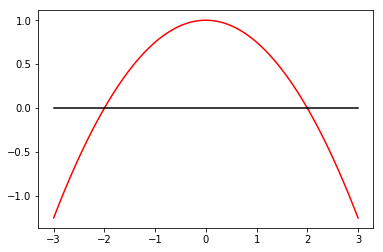

In [7]:
# Gambarnya
def f(x):
    return 1-(x**2/4) # Kenapa fungsinya jadi seperti ini?

X = numpy.linspace(-3,3,100) # 100 titik antara -3 sampai 2
y = [f(x) for x in X] # nilai fungsi di setiap titik
pylab.plot(X,y,'r') # "red", atau r* ro , dsb
pylab.plot(X,[0]*100,'k') # sumbu x, 'k'=hitam

In [8]:
# Contoh Iterasi Titik Tetap
def f(x):
    return 1+x-(x**2/4)

n = 3 # Jumlah iterasi
xo = -2.05 # 1.6, -2.05
for i in range(n):
    x = f(xo)
    print(x, end =', ')
    xo = x
# modify for function in page 51

-2.100625, -2.20378134765625, -2.417944404725649, 

### Diskusi : 
* Apa sebaiknya "stopper" iterasinya?
* Bagaimana mendeteksi apakah iterasinya konvergen/divergen secara numerik?
* Bagaimana menduga error jika kita menggunakan n iterasi? (asumsikan konvergen)

## Metode BiSection (Bolzano)
* Teorema: Asumsikan $f\in C[a,b]$ dan terdapat $r\in [a,b]$ sedemikian sehingga $f(r)=0$. jika $f(a)*f(b)<0$ dan $c$ adalah titik tengah $a$ dan $b$, maka $|r-c_n|\leq \frac{b-a}{2^{n+1}}$ untuk $n=1,2,3,...$ dan $\lim_{n\rightarrow \inf}c_n=r$ 

<p><img alt="" src="images/Bisection_anime.gif" style="width: 400px; height: 400px;" /></p>


In [1]:
# Contoh Aplikasi Bisection di Python
# di Buku Hal 58
import math

def f(x):
    return x*math.sin(x) - 1

a = 0
b = 2
n = 9 # iterasi

if f(a)*f(b)<0:
    for i in range(n):
        c = (a+b)/2 # THE BiSection
        print(a,b,c,f(c))
        if f(a)*f(c)<0:
            b = c
        else:
            a = c
else:
    print('Error, a dan b tidak mengapit akar')

0 2 1.0 -0.1585290151921035
1.0 2 1.5 0.4962424799060816
1.0 1.5 1.25 0.18623077419448286
1.0 1.25 1.125 0.015051043361482108
1.0 1.125 1.0625 -0.0718266313849869
1.0625 1.125 1.09375 -0.028361722663138855
1.09375 1.125 1.109375 -0.0066427748602908565
1.109375 1.125 1.1171875 0.004208034010642736
1.109375 1.1171875 1.11328125 -0.0012164904180159697


## Diskusi:
* Apa kelebihan dan kekurangan Bisection.
* Apa stopper-nya?
* Jika ada >1 akar diapit apakah tetap akan konvergen?

<h2 id="Regula-Falsi">Regula Falsi</h2>

* Kita tau bahwa $m = \frac{f(b)-f(a)}{b-a}$, jika kita ambil 2 pasang titik : $(a,f(a))$ ~ $(b,f(b))$ dan $(b,f(b))$ ~ $(c,0)$ maka $\frac{f(b)-f(a)}{b-a}=\frac{0-f(b)}{c-b}$.
* sehingga kita mendapatkan cara menghitung $c$ dengan cara lain: $c= b - \frac{f(b)(b-a)}{f(b)-f(a)}$

<p><img alt="" src="images/Regula_falsi.png" style="width: 400px; height: 359px;" /></p>


In [5]:
# Regula Falsi di Python
# Buku Halaman 61
def f(x):
    return 2*x**2-5*x #x*math.sin(x) - 1

a = 1 #0
b = 5 #2
tol = 10**-2 # toleransi error
n = 4 # iterasi

if f(a)*f(b)<0:
    for i in range(n):
        c = b - (f(b)*(b-a)) / (f(b)-f(a)) # THE RegulaFalsi
        print(a,b,c,f(c))
        if f(a)*f(c)<0:
            b = c
        else:
            a = c
else:
    print('Error, a dan b tidak mengapit akar')
    
(2.105-2.5)/2.5

1 5 1.4285714285714284 -3.0612244897959187
1.4285714285714284 5 1.818181818181818 -2.479338842975208
1.818181818181818 5 2.105263157894737 -1.6620498614958432
2.105263157894737 5 2.285714285714286 -0.9795918367346932


-0.158

## Diskusi:
* Apa kelebihan dan kekurangan Regula Falsi?
* Apakah stopper Regula Falsi berbeda? Kenapa?

## Not Bracketing, tapi hanya butuh satu titik: Newton-Rhapson
* Teorema: Misal $f\in C^2[a,b]$ dan terdapat $p\in [a,b]$ dimana $f(p)=0$. Jika $f'(p)\neq 0$, maka terdapat $\delta >0$ sedemikian sehingga barisan $f(p)$ berikut akan konvergen ke $p$:
* $p_n = p_{n-1}-\frac{f(p_{n-1})}{f'(p_{n-1})}$ ... (Newton-Rhapson Iteration)


<p><img alt="" src="images/NewtonIteration_Ani.gif" style="width: 550px; height: 392px;" /></p>


## Newton-Rhapson untuk menghitung akar
* Corollary: Misal $A>0 \in \Re$ dan $p>0$ adalah nilai titik awal untuk pendekatan ke $\sqrt{A}$, maka 
* $p_n = \frac{p_{n-1}+\frac{A}{p_{n-1}}}{2}$ konvergen ke $\sqrt{A}$ ... (Coba turunkan formula ini).

In [4]:
# Contoh Buku hal 74
A = 5
p = 2 # Po titik awal
n = 4 # Jumlah iterasi

print(p, end = ', ')
for i in range(n):
    p = 0.5 * (p + A/p)
    print(p, end = ', ')
    
print('\n Akar 5 = ',math.sqrt(5))
print('Error = ', abs(math.sqrt(5)-p))

2, 2.25, 2.236111111111111, 2.2360679779158037, 2.23606797749979, 
 Akar 5 =  2.23606797749979
Error =  0.0


## Order of Convergence Newton:
* Definisi Order of Convergence $R$
* Misal $p_n \rightarrow p$, dan $e_n = p-p_n$ untuk $n\geq 0$. Jika terdapat $A\neq 0$ dan $R>0$ dan $\lim_{n\rightarrow\inf} \frac{|p-p_{n+1}|}{|p-p_n|^R} = \lim_{n\rightarrow\inf} \frac{|e_{n+1}|}{|e_n|^R}=A$, maka barisannya dikatakan konvergen ke $p$.
* $A$ disebut sebagai konstanta error asimtotik.
* Jika $R=1$ convergence rate-nya Linear, R=2 kuadratik.

## Teorema Convergence Rate Newton-Rhapson
* Misal barisan newton $p_n$ konvergen ke $p$. jika p adalah (simple) root, convergence rate metode Newton adalah kuadratik dan 
* $|e_{n+1}|\approx \frac{|f"(p)|}{2|f'(p)|}|e_n|^2$ untuk suatu nilai $n$ yang cukup besar.
* Jika $p$ adalah akar order $M \rightarrow$  konvergensinya linear dan 
* $|e_{n+1}|\approx \frac{M-1}{M}|e_n|$

** "order of root":
* $p$ order $M$ jika: $f(p)=0, f'(p)=0, f"(p)=0, ..., f^{(M)}\neq 0$

## Diskusi:
* Apa kelebihan dan kekurangan metode Newton?
* Apa kekurangan terbesar metode Newton?
* Bagaimana cara terbaik menghitung "A" pada Convergence rate Newton?

In [8]:
# Contoh Aplikasi Newton-Rhapson di Python
# Contoh di Buku Hal 77
def f(x):
    return x**3 + x**2 -3*x -3 # x**3-3*x+2

def df(x): # Turunan pertama f
    return 3*x**2 + 2*x - 3 #3*x**2-3

x = 1 # -2.4 # Initial point/guess
n = 9 # Jumlah iterasi

print(x, end = ', ')
for i in range(n):
    x = x - f(x)/(df(x))
    print(x, end = ', ')
    
abs(2.2-1.732)/1.732

1, 3.0, 2.2, 1.8301507537688444, 1.7377954531428215, 1.7320722915449542, 1.7320508078710555, 1.7320508075688774, 1.7320508075688772, 1.7320508075688774, 

0.2702078521939955

## Metode Secant
* Kelemahan utama metode Newton adalah ia memerlukan turunan (pertama) analitik fungsinya.
* Dalam aplikasinya bahkan sebenarnya yg dibutuhkan turunan kedua (Why?)
* Metode Secant mengganti turunan pertama dengan pendekatannya.
* Kenapa boleh?  Karena turunan pertama di Metode Newton sebenarnya hanya digunakan sebagai "Arah". Apa Maksudnya?
* Turunan pertama fungsi dapat di aproksimasi dengan berbagai cara, cara yang paling mudah adalah menggunakan limit berikut:
* $f'(x) = \lim_{h\rightarrow 0} \frac{f(x+h)-f(x)}{h}$ ... sering disebut sebagai forward differencing
* Aproksimasi dilakukan dengan menggunakan suatu nilai $h$ yang relatif cukup kecil (misal $h=10^{-5}$)

In [9]:
# Contoh Aplikasi Newton-Rhapson di Python
# Contoh di Buku Hal 77
def dfs(x, h=10**-2): 
    return (f(x+h)-f(x))/h # Aproksimasi Turunan pertama f

x = 1 # -2.4 # Initial point/guess
n = 5 # Jumlah iterasi

print(x, end = ', ')
for i in range(n):
    x = x - f(x)/(dfs(x))
    print(x, end = ', ')

abs(2.2-1.732)/1.732

1, 2.9606882015587788, 2.1817616576450876, 1.8255016711899639, 1.7378198680514445, 1.7321097411084792, 

0.2702078521939955

<h1>End of Week III</h1>

<hr />